!pip install catboost

In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image
#from sklearn.preprocessing import OneHotEncoder
#from sklearn.model_selection import KFold
#from sklearn.metrics import accuracy_score
#from sklearn.linear_model import LogisticRegression
#from catboost import Pool, CatBoostClassifier
from sklearn.metrics import f1_score
from sklearn.preprocessing import LabelEncoder

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score,precision_score,recall_score,roc_auc_score


In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

mpl.rc('font', family = 'D2coding')
mpl.rc('axes', unicode_minus=False)

sns.set(font="malgun gothic", rc={"axes.unicode_minus":False}, style='darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

In [3]:
data = pd.read_csv('C:/k-digital/study/oil/train.csv')
data1 = pd.read_csv('C:/k-digital/study/oil/train.csv')
test = pd.read_csv('C:/k-digital/study/oil/test.csv')

,ID,COMPONENT_ARBITRARY,ANONYMOUS_1,YEAR,SAMPLE_TRANSFER_DAY,ANONYMOUS_2,AG,AL,B,BA,...,U25,U20,U14,U6,U4,V,V100,V40,ZN,Y_LABEL
0,TRAIN_00000,COMPONENT3,1486,2011,7,200,0,3,93,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,154.0,75,0
1,TRAIN_00001,COMPONENT2,1350,2021,51,375,0,2,19,0,...,2.0,4.0,6.0,216.0,1454.0,0,NaN,44.0,652,0
2,TRAIN_00002,COMPONENT2,2415,2015,2,200,0,110,1,1,...,0.0,3.0,39.0,11261.0,41081.0,0,NaN,72.6,412,1
3,TRAIN_00003,COMPONENT3,7389,2010,2,200,0,8,3,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.3,7,0
4,TRAIN_00004,COMPONENT3,3954,2015,4,200,0,1,157,0,...,NaN,NaN,NaN,NaN,NaN,0,NaN,133.1,128,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,TRAIN_14090,COMPONENT3,1616,2014,8,200,0,2,201,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,135.4,16,0
14091,TRAIN_14091,COMPONENT1,2784,2013,2,200,0,3,85,0,...,NaN,NaN,NaN,NaN,NaN,0,14.5,117.5,1408,0
14092,TRAIN_14092,COMPONENT3,1788,2008,9,550,0,6,0,1,...,NaN,NaN,NaN,NaN,NaN,0,NaN,54.0,1301,0
14093,TRAIN_14093,COMPONENT2,2498,2009,19,550,0,2,4,0,...,7.0,8.0,100.0,1625.0,18890.0,0,NaN,44.3,652,0


In [4]:
data_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']

data = data[data_features]
# test = test[data_features]
# 'COMPONENT_ARBITRARY', 'ANONYMOUS_1'

In [5]:
test_features = ['YEAR','COMPONENT_ARBITRARY', 'ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 
                       'MN', 'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']
test = test[test_features]

In [6]:
data.shape

(14095, 18)

In [7]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2011,COMPONENT3,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,2021,COMPONENT2,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,2015,COMPONENT2,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


# 라벨인코딩

In [8]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    data[col] = le.fit_transform(data[col])

In [9]:
le = LabelEncoder()
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
for col in categorical_features:    
    test[col] = le.fit_transform(test[col])

In [10]:
data['YEAR'].unique()

array([ 4, 14,  8,  3,  1,  2,  7, 11,  6,  9, 10,  5, 12,  0, 15, 13],
      dtype=int64)

In [11]:
data.head(3)

,YEAR,COMPONENT_ARBITRARY,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,4,2,1486,200,0,0,13,78,888,0.0,16,1,6,8504,5,0,154.0,75
1,14,1,1350,375,0,0,0,31,2,0.0,0,0,0,19,0,0,44.0,652
2,8,1,2415,200,0,0,1,2,4,0.0,0,0,0,17,0,0,72.6,412


In [12]:
# 스케일링
data_need_scale = data.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
data_scaled = ss.fit_transform(data_need_scale)
data_scaled

array([[-0.39376339, -0.3407601 , -0.15021362, ..., -0.1065502 ,
         0.89989172, -0.96600175],
       [-0.42602191, -0.0225763 , -0.15021362, ..., -0.1065502 ,
        -1.31737552,  0.11914661],
       [-0.17340923, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -0.74088603, -0.33221493],
       ...,
       [-0.3221305 ,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.11580577,  1.33970343],
       [-0.15372204,  0.29560751, -0.15021362, ..., -0.1065502 ,
        -1.31132842,  0.11914661],
       [-0.29509027, -0.3407601 , -0.15021362, ..., -0.1065502 ,
        -1.25690459,  0.04391969]])

In [13]:
test_need_scale = test.drop(columns = ['COMPONENT_ARBITRARY', 'YEAR'])

ss = StandardScaler()
test_scaled = ss.fit_transform(test_need_scale)
test_scaled

array([[-0.20832585, -0.34182023, -0.14900964, ..., -0.12384153,
        -0.42300603,  0.96054395],
       [-0.08380289, -0.34182023, -0.14900964, ..., -0.12384153,
         0.36151644, -1.0724087 ],
       [-0.2517641 , -0.34182023, -0.14900964, ..., -0.12384153,
        -1.45875198,  0.25023519],
       ...,
       [ 0.23288258, -0.34182023, -0.14900964, ..., -0.12384153,
         4.22462848, -1.07052459],
       [-0.37959664, -0.34182023, -0.14900964, ..., -0.12384153,
        -1.30889938, -0.19441432],
       [-0.16592186,  2.13663024,  5.40757816, ..., -0.12384153,
        -0.6720258 ,  0.73256687]])

In [14]:
data_need_scale.columns

Index(['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN'],
      dtype='object')

In [15]:
data_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


data_df = pd.DataFrame(data_scaled, columns = data_name)
data_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215
3,1.006399,-0.340760,-0.150214,-0.089633,-0.115388,-0.260252,-0.264764,-0.041588,-0.160621,-0.400998,-0.191804,-0.242884,-0.102635,-0.10655,0.482642,-1.093888
4,0.191634,-0.340760,-0.150214,-0.089633,-0.115388,-0.268007,-0.200996,-0.041588,-0.250456,-0.400998,-0.191804,-0.129674,-0.102635,-0.10655,0.478611,-0.866326
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14090,-0.362928,-0.340760,-0.150214,-0.089633,-0.115388,-0.244743,-0.291021,-0.041588,-0.250456,-0.400998,-0.191804,-0.248773,-0.102635,-0.10655,0.524972,-1.076961
14091,-0.085884,-0.340760,-0.150214,-0.089633,-0.115388,-0.252497,-0.311651,-0.041588,-0.250456,3.342831,-0.191804,-0.265787,-0.102635,-0.10655,0.164162,1.540935
14092,-0.322130,0.295608,-0.150214,-0.089633,0.024499,-0.213724,0.444177,-0.041588,0.378393,-0.233862,0.070899,0.150406,-0.102635,-0.10655,-1.115806,1.339703
14093,-0.153722,0.295608,-0.150214,-0.089633,-0.115388,1.050289,-0.298523,-0.041588,-0.250456,-0.384284,-0.191804,-0.264479,-0.102635,-0.10655,-1.311328,0.119147


In [16]:
test_name = ['ANONYMOUS_1', 'ANONYMOUS_2', 'AG', 'CO', 'CR', 'CU', 'FE', 'H2O', 'MN',
       'MO', 'NI', 'PQINDEX', 'TI', 'V', 'V40', 'ZN']


test_df = pd.DataFrame(test_scaled, columns = test_name)
test_df

,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,-0.208326,-0.34182,-0.149010,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,-0.083803,-0.34182,-0.149010,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,-0.251764,-0.34182,-0.149010,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235
3,-0.371323,-0.34182,-0.149010,-0.114836,-0.007360,-0.216993,-0.051547,-0.073334,0.077114,-0.354146,-0.154766,4.155529,-0.108232,-0.123842,0.711907,-0.917912
4,1.039593,-0.34182,-0.149010,-0.114836,-0.149412,-0.203999,-0.268646,-0.073334,-0.276403,-0.402347,-0.154766,-0.253291,-0.108232,-0.123842,-1.037842,-0.211371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,-0.307200,-0.34182,-0.149010,-0.114836,-0.007360,0.601670,1.227891,-0.073334,5.468260,-0.322013,0.195596,0.840776,-0.108232,-0.123842,-0.865953,1.096200
6037,0.192754,-0.34182,-0.149010,-0.114836,0.087341,-0.229988,0.777772,-0.073334,0.165494,-0.402347,-0.154766,0.120225,-0.108232,-0.123842,0.601721,-1.070525
6038,0.232883,-0.34182,-0.149010,-0.114836,-0.149412,-0.242983,-0.210753,-0.073334,-0.276403,-0.402347,-0.154766,-0.224050,-0.108232,-0.123842,4.224628,-1.070525
6039,-0.379597,-0.34182,-0.149010,-0.114836,-0.149412,0.159852,-0.284567,-0.073334,-0.276403,-0.402347,-0.154766,-0.259360,-0.108232,-0.123842,-1.308899,-0.194414


In [17]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
data_label = data[categorical_features]
data_new = pd.concat([data_label,data_df], axis=1)

In [18]:
categorical_features = ['COMPONENT_ARBITRARY', 'YEAR']
test_label = test[categorical_features]
test_new = pd.concat([test_label,test_df], axis=1)

In [19]:
test_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,9,-0.208326,-0.34182,-0.14901,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,2,4,-0.083803,-0.34182,-0.14901,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,1,3,-0.251764,-0.34182,-0.14901,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235


In [20]:
data_new.head(3)

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,2,4,-0.393763,-0.340760,-0.150214,-0.089633,0.339245,0.336858,1.331290,-0.041588,1.186914,-0.384284,1.384414,5.293270,0.622282,-0.10655,0.899892,-0.966002
1,1,14,-0.426022,-0.022576,-0.150214,-0.089633,-0.115388,-0.027612,-0.330406,-0.041588,-0.250456,-0.400998,-0.191804,-0.259244,-0.102635,-0.10655,-1.317376,0.119147
2,1,8,-0.173409,-0.340760,-0.150214,-0.089633,-0.080416,-0.252497,-0.326655,-0.041588,-0.250456,-0.400998,-0.191804,-0.260552,-0.102635,-0.10655,-0.740886,-0.332215


In [21]:
answer = data1['Y_LABEL'] 

In [22]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data_new, answer, test_size = 0.2, stratify = answer, random_state = 2022)

In [90]:
y_train

6576     0
5159     0
6330     0
6953     0
428      1
        ..
1120     0
12553    0
1790     0
7443     0
9124     0
Name: Y_LABEL, Length: 11276, dtype: int64

# oversampling

In [23]:
#!pip install imblearn

In [ ]:
oversample = RandomOverSampler(sampling_strategy='minority')
X_over, y_over = oversample.fit_resample(X, y)
print(Counter(y_over))

In [24]:
from imblearn.over_sampling import SMOTE
from imblearn.over_sampling import RandomOverSampler

smote = SMOTE(random_state=42)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("SMOTE 적용 전 학습용 피처/레이블 데이터 세트 : ", X_train.shape, y_train.shape)
print('SMOTE 적용 후 학습용 피처/레이블 데이터 세트 :', X_train_over.shape, y_train_over.shape)
print('SMOTE 적용 후 값의 분포 :\n',pd.Series(y_train_over).value_counts() )

SMOTE 적용 전 학습용 피처/레이블 데이터 세트 :  (11276, 18) (11276,)
SMOTE 적용 후 학습용 피처/레이블 데이터 세트 : (20628, 18) (20628,)
SMOTE 적용 후 값의 분포 :
 0    10314
1    10314
Name: Y_LABEL, dtype: int64


# LGBM

In [25]:
import lightgbm as ltb
from lightgbm import LGBMClassifier

In [26]:
# 점수 구하기 
def get_clf_eval(y_test, pred = None, pred_proba = None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    print('정확도 : {:.4f}, 정밀도 : {:.4f}, 재현율 : {:.4f}, F1 : {:.4f}, AUC : {:.4f}'.
          format(accuracy, precision, recall, f1, roc_auc))
    print('Macro f1 socre : ', f1_score(y_test, pred, average='macro'))

# 훈련 시키기 
def get_model_train_eval(model, ftr_train = None, ftr_test = None, tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    pred = model.predict(ftr_test)
    pred_proba = model.predict_proba(ftr_test)[:,1]
    get_clf_eval(tgt_test, pred, pred_proba)

In [27]:
## 증식한 데이터로 LGBM 적용
## 불균형한 데이터 세트에서 boost_from_average = False로 파라미터를 설정
lgbm_clf = LGBMClassifier(n_estimators=1000, num_leaves=64, n_jobs=-1, boost_from_average=False)
get_model_train_eval(lgbm_clf, X_  train_over, X_test, y_train_over, y_test)

오차 행렬
[[2552   26]
 [ 228   13]]
정확도 : 0.9099, 정밀도 : 0.3333, 재현율 : 0.0539, F1 : 0.0929, AUC : 0.6415
Macro f1 socre :  0.5227256972217778


In [28]:
print(lgbm_clf.score(X_train_over, y_train_over))
print(lgbm_clf.score(X_test, y_test))

1.0
0.9098971266406527


# HyperOpt

In [29]:
#!pip install hyperopt

In [37]:
X_tr, X_val, y_tr, y_val = train_test_split(X_train_over, y_train_over, test_size = 0.1, stratify=y_train_over, random_state=2022)

from hyperopt import hp

lgbm_search_space = {
    'num_leaves':hp.quniform('num_leaves', 31, 64, 1),
    'max_depth':hp.quniform('max_depth', 1, 169, 1),                  ## 정수형 하이퍼 파라미터 => quniform 사용
    'min_child_weight':hp.quniform('min_child_weight', 60, 100, 1),     ## 정수형 하이퍼 파라미터 => quniform 사용
    'learning_rate':hp.uniform('learning_rate', 0.01, 1.0),
    'subsample':hp.uniform('subsample', 0.7, 1),


In [86]:
from sklearn.model_selection import cross_val_score
from hyperopt import STATUS_OK
from sklearn.model_selection import KFold

def objective_func(search_space):

    lgbm_clf = LGBMClassifier(
    n_estimators=100,
    max_depth=int(search_space['max_depth']),                ## int형으로 형변환 필요
    min_child_weight=int(search_space['min_child_weight']),  ## int형으로 형변환 필요
    learning_rate=search_space['learning_rate'], 
    subsample=search_space['subsample'],
    num_leaves=int(search_space['num_leaves']),
      #eval_metric='logloss' => 불균형 데이터셋이므로 성능 평가 지표를 roc-auc로 설정
            )

      ## XGBoost와 LightGBM에서는 cross_val_score()를 적용하면 early stopping 지원 불가, KFold 방식으로 직접 구현해야 함
      ## 3개의 k-fold 방식으로 평가된 roc-auc 지표를 담는 list
    roc_auc_list = []

  ## 3개의 k-fold 방식 적용
    kf = KFold(n_splits=3)

    for tr_index, val_index in kf.split(X_train):

        X_tr, y_tr = X_train.iloc[tr_index], y_train.iloc[tr_index]
        X_val, y_val = X_train.iloc[val_index], y_train.iloc[val_index]

        lgbm_clf.fit(
            X_tr, y_tr,
            early_stopping_rounds=30,
            eval_metric='auc',
            eval_set=[(X_tr, y_tr), (X_val, y_val)]
    )

        score = roc_auc_score(
            y_val,
            lgbm_clf.predict_proba(X_val)[:, 1]
    )

        roc_auc_list.append(score)

    return (-1) * np.mean(roc_auc_list)


In [39]:
## 3) fmin()을 사용하여 최적 하이퍼 파라미터 찾기

from hyperopt import fmin, tpe, Trials

trials = Trials()

best = fmin(
    fn=objective_func,
    space=lgbm_search_space,
    max_evals=30,  ## 30번 만큼 반복하며 최적의 하이퍼 파라미터 찾음
    trials=trials,
)

best

[1]	training's auc: 0.646652	training's binary_logloss: 0.281628	valid_1's auc: 0.62058	valid_1's binary_logloss: 0.282838
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.680948	training's binary_logloss: 0.275727	valid_1's auc: 0.658064	valid_1's binary_logloss: 0.277383
[3]	training's auc: 0.690666	training's binary_logloss: 0.273891	valid_1's auc: 0.655542	valid_1's binary_logloss: 0.277764
[4]	training's auc: 0.697512	training's binary_logloss: 0.272183	valid_1's auc: 0.650587	valid_1's binary_logloss: 0.278924
[5]	training's auc: 0.700929	training's binary_logloss: 0.271273	valid_1's auc: 0.65221	valid_1's binary_logloss: 0.278653
[6]	training's auc: 0.705529	training's binary_logloss: 0.270206	valid_1's auc: 0.653954	valid_1's binary_logloss: 0.278618
[7]	training's auc: 0.710497	training's binary_logloss: 0.269489	valid_1's auc: 0.659542	valid_1's binary_logloss: 0.277736
[8]	training's

[26]	training's auc: 0.741128	training's binary_logloss: 0.262824	valid_1's auc: 0.660052	valid_1's binary_logloss: 0.277764
[27]	training's auc: 0.741571	training's binary_logloss: 0.262349	valid_1's auc: 0.660196	valid_1's binary_logloss: 0.277969
[28]	training's auc: 0.743605	training's binary_logloss: 0.261898	valid_1's auc: 0.65942	valid_1's binary_logloss: 0.278087
[29]	training's auc: 0.744774	training's binary_logloss: 0.261535	valid_1's auc: 0.659818	valid_1's binary_logloss: 0.278062
[30]	training's auc: 0.747094	training's binary_logloss: 0.261177	valid_1's auc: 0.660174	valid_1's binary_logloss: 0.277924
[31]	training's auc: 0.748746	training's binary_logloss: 0.260804	valid_1's auc: 0.659601	valid_1's binary_logloss: 0.278059
[32]	training's auc: 0.750704	training's binary_logloss: 0.260268	valid_1's auc: 0.658672	valid_1's binary_logloss: 0.27818
[33]	training's auc: 0.752579	training's binary_logloss: 0.260014	valid_1's auc: 0.659158	valid_1's binary_logloss: 0.277995
[3

Early stopping, best iteration is:                                                                                     
[4]	training's auc: 0.704362	training's binary_logloss: 0.271361	valid_1's auc: 0.670087	valid_1's binary_logloss: 0.275757
[1]	training's auc: 0.642599	training's binary_logloss: 0.278456	valid_1's auc: 0.641036	valid_1's binary_logloss: 0.28891
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.672377	training's binary_logloss: 0.27363	valid_1's auc: 0.66865	valid_1's binary_logloss: 0.284705
[3]	training's auc: 0.683669	training's binary_logloss: 0.271699	valid_1's auc: 0.674943	valid_1's binary_logloss: 0.283563
[4]	training's auc: 0.689256	training's binary_logloss: 0.270146	valid_1's auc: 0.675205	valid_1's binary_logloss: 0.283303
[5]	training's auc: 0.697069	training's binary_logloss: 0.268832	valid_1's auc: 0.67472	valid_1's binary_logloss: 0.283201
[6]	training's auc: 

[17]	training's auc: 0.73168	training's binary_logloss: 0.261106	valid_1's auc: 0.662553	valid_1's binary_logloss: 0.285165
[18]	training's auc: 0.733983	training's binary_logloss: 0.260715	valid_1's auc: 0.662969	valid_1's binary_logloss: 0.285761
[19]	training's auc: 0.734746	training's binary_logloss: 0.260384	valid_1's auc: 0.657679	valid_1's binary_logloss: 0.286736
[20]	training's auc: 0.736399	training's binary_logloss: 0.25974	valid_1's auc: 0.662596	valid_1's binary_logloss: 0.286065
[21]	training's auc: 0.738966	training's binary_logloss: 0.259285	valid_1's auc: 0.663869	valid_1's binary_logloss: 0.285489
[22]	training's auc: 0.739719	training's binary_logloss: 0.258889	valid_1's auc: 0.663877	valid_1's binary_logloss: 0.286074
[23]	training's auc: 0.743223	training's binary_logloss: 0.258438	valid_1's auc: 0.659285	valid_1's binary_logloss: 0.286636
[24]	training's auc: 0.746064	training's binary_logloss: 0.257954	valid_1's auc: 0.659827	valid_1's binary_logloss: 0.286432
[2

[29]	training's auc: 0.716061	training's binary_logloss: 0.265049	valid_1's auc: 0.677212	valid_1's binary_logloss: 0.282228
[30]	training's auc: 0.716898	training's binary_logloss: 0.264869	valid_1's auc: 0.677666	valid_1's binary_logloss: 0.282127
[31]	training's auc: 0.717834	training's binary_logloss: 0.264566	valid_1's auc: 0.676838	valid_1's binary_logloss: 0.282354
[32]	training's auc: 0.719134	training's binary_logloss: 0.264373	valid_1's auc: 0.676978	valid_1's binary_logloss: 0.282359
[33]	training's auc: 0.720023	training's binary_logloss: 0.264195	valid_1's auc: 0.676683	valid_1's binary_logloss: 0.282385
[34]	training's auc: 0.721108	training's binary_logloss: 0.264014	valid_1's auc: 0.676312	valid_1's binary_logloss: 0.282417
[35]	training's auc: 0.722287	training's binary_logloss: 0.263778	valid_1's auc: 0.676108	valid_1's binary_logloss: 0.282488
[36]	training's auc: 0.723199	training's binary_logloss: 0.263549	valid_1's auc: 0.676791	valid_1's binary_logloss: 0.282292


[13]	training's auc: 0.675385	training's binary_logloss: 0.278607	valid_1's auc: 0.676905	valid_1's binary_logloss: 0.289206
[14]	training's auc: 0.675315	training's binary_logloss: 0.278119	valid_1's auc: 0.677974	valid_1's binary_logloss: 0.288731
[15]	training's auc: 0.679478	training's binary_logloss: 0.277618	valid_1's auc: 0.680934	valid_1's binary_logloss: 0.288269
[16]	training's auc: 0.679578	training's binary_logloss: 0.277272	valid_1's auc: 0.681179	valid_1's binary_logloss: 0.287879
[17]	training's auc: 0.679557	training's binary_logloss: 0.276876	valid_1's auc: 0.681308	valid_1's binary_logloss: 0.287495
[18]	training's auc: 0.681742	training's binary_logloss: 0.276479	valid_1's auc: 0.682211	valid_1's binary_logloss: 0.287213
[19]	training's auc: 0.682807	training's binary_logloss: 0.276077	valid_1's auc: 0.682109	valid_1's binary_logloss: 0.286845
[20]	training's auc: 0.683637	training's binary_logloss: 0.275723	valid_1's auc: 0.683057	valid_1's binary_logloss: 0.286515


[42]	training's auc: 0.691869	training's binary_logloss: 0.276862	valid_1's auc: 0.677627	valid_1's binary_logloss: 0.272155
[43]	training's auc: 0.692503	training's binary_logloss: 0.276735	valid_1's auc: 0.677627	valid_1's binary_logloss: 0.272104
[44]	training's auc: 0.69252	training's binary_logloss: 0.276604	valid_1's auc: 0.677371	valid_1's binary_logloss: 0.272054
[45]	training's auc: 0.693002	training's binary_logloss: 0.276447	valid_1's auc: 0.677382	valid_1's binary_logloss: 0.272014
[46]	training's auc: 0.693128	training's binary_logloss: 0.276336	valid_1's auc: 0.677352	valid_1's binary_logloss: 0.27193
[47]	training's auc: 0.693439	training's binary_logloss: 0.276183	valid_1's auc: 0.677341	valid_1's binary_logloss: 0.271931
[48]	training's auc: 0.694204	training's binary_logloss: 0.276028	valid_1's auc: 0.677875	valid_1's binary_logloss: 0.271876
[49]	training's auc: 0.694461	training's binary_logloss: 0.27589	valid_1's auc: 0.677512	valid_1's binary_logloss: 0.271858
[50

[2]	training's auc: 0.656873	training's binary_logloss: 0.285668	valid_1's auc: 0.656492	valid_1's binary_logloss: 0.278053
[3]	training's auc: 0.678072	training's binary_logloss: 0.282052	valid_1's auc: 0.67285	valid_1's binary_logloss: 0.275222
[4]	training's auc: 0.678598	training's binary_logloss: 0.280178	valid_1's auc: 0.67044	valid_1's binary_logloss: 0.273949
[5]	training's auc: 0.686278	training's binary_logloss: 0.2784	valid_1's auc: 0.674629	valid_1's binary_logloss: 0.272773
[6]	training's auc: 0.688435	training's binary_logloss: 0.277193	valid_1's auc: 0.676509	valid_1's binary_logloss: 0.272256
[7]	training's auc: 0.690419	training's binary_logloss: 0.276379	valid_1's auc: 0.67637	valid_1's binary_logloss: 0.272134
[8]	training's auc: 0.691841	training's binary_logloss: 0.275801	valid_1's auc: 0.675386	valid_1's binary_logloss: 0.272011
[9]	training's auc: 0.693931	training's binary_logloss: 0.275238	valid_1's auc: 0.676183	valid_1's binary_logloss: 0.271925
[10]	training

[23]	training's auc: 0.765098	training's binary_logloss: 0.255942	valid_1's auc: 0.651792	valid_1's binary_logloss: 0.281392
[24]	training's auc: 0.765917	training's binary_logloss: 0.255386	valid_1's auc: 0.654637	valid_1's binary_logloss: 0.280416
[25]	training's auc: 0.768444	training's binary_logloss: 0.254798	valid_1's auc: 0.655542	valid_1's binary_logloss: 0.280335
[26]	training's auc: 0.769504	training's binary_logloss: 0.254161	valid_1's auc: 0.656034	valid_1's binary_logloss: 0.281005
[27]	training's auc: 0.77205	training's binary_logloss: 0.253634	valid_1's auc: 0.653738	valid_1's binary_logloss: 0.281197
[28]	training's auc: 0.775218	training's binary_logloss: 0.253036	valid_1's auc: 0.65528	valid_1's binary_logloss: 0.280941
[29]	training's auc: 0.776447	training's binary_logloss: 0.252682	valid_1's auc: 0.656252	valid_1's binary_logloss: 0.280466
[30]	training's auc: 0.776946	training's binary_logloss: 0.252257	valid_1's auc: 0.655901	valid_1's binary_logloss: 0.280734
[3

[8]	training's auc: 0.695689	training's binary_logloss: 0.268877	valid_1's auc: 0.669489	valid_1's binary_logloss: 0.283961
[9]	training's auc: 0.698958	training's binary_logloss: 0.268218	valid_1's auc: 0.66646	valid_1's binary_logloss: 0.284599
[10]	training's auc: 0.707728	training's binary_logloss: 0.266497	valid_1's auc: 0.662965	valid_1's binary_logloss: 0.284698
[11]	training's auc: 0.71151	training's binary_logloss: 0.265885	valid_1's auc: 0.66531	valid_1's binary_logloss: 0.284522
[12]	training's auc: 0.71361	training's binary_logloss: 0.26533	valid_1's auc: 0.663215	valid_1's binary_logloss: 0.284956
[13]	training's auc: 0.717031	training's binary_logloss: 0.264812	valid_1's auc: 0.662657	valid_1's binary_logloss: 0.28494
[14]	training's auc: 0.718544	training's binary_logloss: 0.264275	valid_1's auc: 0.663682	valid_1's binary_logloss: 0.285434
[15]	training's auc: 0.720194	training's binary_logloss: 0.264036	valid_1's auc: 0.66505	valid_1's binary_logloss: 0.28503
[16]	train

[32]	training's auc: 0.73517	training's binary_logloss: 0.260209	valid_1's auc: 0.659081	valid_1's binary_logloss: 0.286193
[33]	training's auc: 0.736372	training's binary_logloss: 0.260055	valid_1's auc: 0.659643	valid_1's binary_logloss: 0.286237
[34]	training's auc: 0.737084	training's binary_logloss: 0.259754	valid_1's auc: 0.661334	valid_1's binary_logloss: 0.285738
[35]	training's auc: 0.739995	training's binary_logloss: 0.259326	valid_1's auc: 0.664276	valid_1's binary_logloss: 0.285012
[36]	training's auc: 0.740628	training's binary_logloss: 0.259038	valid_1's auc: 0.660637	valid_1's binary_logloss: 0.285826
[37]	training's auc: 0.741277	training's binary_logloss: 0.258831	valid_1's auc: 0.661124	valid_1's binary_logloss: 0.285837
[38]	training's auc: 0.741473	training's binary_logloss: 0.258672	valid_1's auc: 0.66093	valid_1's binary_logloss: 0.285897
Early stopping, best iteration is:                                                                                     
[8]	tra

[12]	training's auc: 0.716113	training's binary_logloss: 0.268988	valid_1's auc: 0.667753	valid_1's binary_logloss: 0.273951
[13]	training's auc: 0.716605	training's binary_logloss: 0.268467	valid_1's auc: 0.668858	valid_1's binary_logloss: 0.27403
[14]	training's auc: 0.718761	training's binary_logloss: 0.267934	valid_1's auc: 0.666511	valid_1's binary_logloss: 0.274906
[15]	training's auc: 0.72047	training's binary_logloss: 0.267234	valid_1's auc: 0.671233	valid_1's binary_logloss: 0.274131
[16]	training's auc: 0.723951	training's binary_logloss: 0.266575	valid_1's auc: 0.673605	valid_1's binary_logloss: 0.273341
[17]	training's auc: 0.727504	training's binary_logloss: 0.265827	valid_1's auc: 0.672379	valid_1's binary_logloss: 0.273626
[18]	training's auc: 0.728165	training's binary_logloss: 0.265268	valid_1's auc: 0.673137	valid_1's binary_logloss: 0.273971
[19]	training's auc: 0.729609	training's binary_logloss: 0.264735	valid_1's auc: 0.674646	valid_1's binary_logloss: 0.273496
[2

[3]	training's auc: 0.689361	training's binary_logloss: 0.270708	valid_1's auc: 0.681227	valid_1's binary_logloss: 0.281219
[4]	training's auc: 0.691071	training's binary_logloss: 0.269737	valid_1's auc: 0.675567	valid_1's binary_logloss: 0.28225
[5]	training's auc: 0.698625	training's binary_logloss: 0.268509	valid_1's auc: 0.66625	valid_1's binary_logloss: 0.283746
[6]	training's auc: 0.701261	training's binary_logloss: 0.267523	valid_1's auc: 0.661207	valid_1's binary_logloss: 0.284111
[7]	training's auc: 0.705808	training's binary_logloss: 0.266566	valid_1's auc: 0.657118	valid_1's binary_logloss: 0.285056
[8]	training's auc: 0.713078	training's binary_logloss: 0.265251	valid_1's auc: 0.666529	valid_1's binary_logloss: 0.283816
[9]	training's auc: 0.71765	training's binary_logloss: 0.264621	valid_1's auc: 0.666383	valid_1's binary_logloss: 0.283419
[10]	training's auc: 0.720109	training's binary_logloss: 0.263724	valid_1's auc: 0.659247	valid_1's binary_logloss: 0.285179
[11]	train

[33]	training's auc: 0.77172	training's binary_logloss: 0.254408	valid_1's auc: 0.667173	valid_1's binary_logloss: 0.276283
Early stopping, best iteration is:                                                                                     
[3]	training's auc: 0.685973	training's binary_logloss: 0.27641	valid_1's auc: 0.67702	valid_1's binary_logloss: 0.271444
[1]	training's auc: 0.651555	training's binary_logloss: 0.283273	valid_1's auc: 0.624989	valid_1's binary_logloss: 0.283106
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.68553	training's binary_logloss: 0.277939	valid_1's auc: 0.662144	valid_1's binary_logloss: 0.27887
[3]	training's auc: 0.691045	training's binary_logloss: 0.275028	valid_1's auc: 0.659136	valid_1's binary_logloss: 0.277364
[4]	training's auc: 0.701936	training's binary_logloss: 0.2729	valid_1's auc: 0.654221	valid_1's binary_logloss: 0.277951
[5]	training's auc: 0.

[10]	training's auc: 0.740676	training's binary_logloss: 0.262844	valid_1's auc: 0.65034	valid_1's binary_logloss: 0.280364
[11]	training's auc: 0.746559	training's binary_logloss: 0.261018	valid_1's auc: 0.655652	valid_1's binary_logloss: 0.280194
[12]	training's auc: 0.747755	training's binary_logloss: 0.260027	valid_1's auc: 0.658132	valid_1's binary_logloss: 0.279492
[13]	training's auc: 0.751684	training's binary_logloss: 0.259057	valid_1's auc: 0.659081	valid_1's binary_logloss: 0.279651
[14]	training's auc: 0.753988	training's binary_logloss: 0.258262	valid_1's auc: 0.657723	valid_1's binary_logloss: 0.280701
[15]	training's auc: 0.75811	training's binary_logloss: 0.257126	valid_1's auc: 0.659188	valid_1's binary_logloss: 0.280224
[16]	training's auc: 0.76264	training's binary_logloss: 0.256041	valid_1's auc: 0.65978	valid_1's binary_logloss: 0.280171
[17]	training's auc: 0.767083	training's binary_logloss: 0.255278	valid_1's auc: 0.655221	valid_1's binary_logloss: 0.280626
[18]

[36]	training's auc: 0.729362	training's binary_logloss: 0.265631	valid_1's auc: 0.662747	valid_1's binary_logloss: 0.27689
[37]	training's auc: 0.730098	training's binary_logloss: 0.265502	valid_1's auc: 0.663403	valid_1's binary_logloss: 0.276836
[38]	training's auc: 0.730391	training's binary_logloss: 0.265341	valid_1's auc: 0.662584	valid_1's binary_logloss: 0.276967
[39]	training's auc: 0.731	training's binary_logloss: 0.265168	valid_1's auc: 0.662094	valid_1's binary_logloss: 0.277163
[40]	training's auc: 0.73144	training's binary_logloss: 0.265002	valid_1's auc: 0.662782	valid_1's binary_logloss: 0.276985
[41]	training's auc: 0.732708	training's binary_logloss: 0.264786	valid_1's auc: 0.662257	valid_1's binary_logloss: 0.277053
[42]	training's auc: 0.733331	training's binary_logloss: 0.264537	valid_1's auc: 0.66185	valid_1's binary_logloss: 0.277242
Early stopping, best iteration is:                                                                                     
[12]	traini

[38]	training's auc: 0.747204	training's binary_logloss: 0.261651	valid_1's auc: 0.673813	valid_1's binary_logloss: 0.274955
[39]	training's auc: 0.748941	training's binary_logloss: 0.261422	valid_1's auc: 0.673643	valid_1's binary_logloss: 0.274988
[40]	training's auc: 0.750203	training's binary_logloss: 0.261078	valid_1's auc: 0.673213	valid_1's binary_logloss: 0.275184
[41]	training's auc: 0.750546	training's binary_logloss: 0.260891	valid_1's auc: 0.672944	valid_1's binary_logloss: 0.275336
[42]	training's auc: 0.751757	training's binary_logloss: 0.260678	valid_1's auc: 0.673304	valid_1's binary_logloss: 0.275227
[43]	training's auc: 0.751765	training's binary_logloss: 0.260491	valid_1's auc: 0.673255	valid_1's binary_logloss: 0.275252
[44]	training's auc: 0.752887	training's binary_logloss: 0.260232	valid_1's auc: 0.673255	valid_1's binary_logloss: 0.275304
[45]	training's auc: 0.753721	training's binary_logloss: 0.260013	valid_1's auc: 0.672655	valid_1's binary_logloss: 0.275447


[12]	training's auc: 0.691683	training's binary_logloss: 0.275785	valid_1's auc: 0.665735	valid_1's binary_logloss: 0.276706
[13]	training's auc: 0.692547	training's binary_logloss: 0.275468	valid_1's auc: 0.66565	valid_1's binary_logloss: 0.276519
[14]	training's auc: 0.693606	training's binary_logloss: 0.275118	valid_1's auc: 0.665528	valid_1's binary_logloss: 0.276377
[15]	training's auc: 0.695085	training's binary_logloss: 0.274673	valid_1's auc: 0.66826	valid_1's binary_logloss: 0.276233
[16]	training's auc: 0.695858	training's binary_logloss: 0.274313	valid_1's auc: 0.668383	valid_1's binary_logloss: 0.276112
[17]	training's auc: 0.697851	training's binary_logloss: 0.273938	valid_1's auc: 0.668337	valid_1's binary_logloss: 0.276065
[18]	training's auc: 0.698911	training's binary_logloss: 0.273556	valid_1's auc: 0.668577	valid_1's binary_logloss: 0.275769
[19]	training's auc: 0.699839	training's binary_logloss: 0.273376	valid_1's auc: 0.669595	valid_1's binary_logloss: 0.275707
[2

[68]	training's auc: 0.710991	training's binary_logloss: 0.266091	valid_1's auc: 0.680911	valid_1's binary_logloss: 0.281253
[69]	training's auc: 0.711338	training's binary_logloss: 0.266054	valid_1's auc: 0.68115	valid_1's binary_logloss: 0.281204
[70]	training's auc: 0.711691	training's binary_logloss: 0.265932	valid_1's auc: 0.680737	valid_1's binary_logloss: 0.281204
[71]	training's auc: 0.712296	training's binary_logloss: 0.265877	valid_1's auc: 0.680189	valid_1's binary_logloss: 0.281257
[72]	training's auc: 0.712687	training's binary_logloss: 0.265826	valid_1's auc: 0.680739	valid_1's binary_logloss: 0.281241
[73]	training's auc: 0.713397	training's binary_logloss: 0.265766	valid_1's auc: 0.681348	valid_1's binary_logloss: 0.281169
[74]	training's auc: 0.713444	training's binary_logloss: 0.265715	valid_1's auc: 0.681361	valid_1's binary_logloss: 0.281214
[75]	training's auc: 0.713715	training's binary_logloss: 0.265668	valid_1's auc: 0.680645	valid_1's binary_logloss: 0.281349
[

[12]	training's auc: 0.713856	training's binary_logloss: 0.264576	valid_1's auc: 0.676679	valid_1's binary_logloss: 0.282915
[13]	training's auc: 0.717278	training's binary_logloss: 0.264042	valid_1's auc: 0.67657	valid_1's binary_logloss: 0.282652
[14]	training's auc: 0.722559	training's binary_logloss: 0.26333	valid_1's auc: 0.673534	valid_1's binary_logloss: 0.282689
[15]	training's auc: 0.723835	training's binary_logloss: 0.262869	valid_1's auc: 0.675202	valid_1's binary_logloss: 0.282382
[16]	training's auc: 0.725733	training's binary_logloss: 0.262492	valid_1's auc: 0.674071	valid_1's binary_logloss: 0.282838
[17]	training's auc: 0.727233	training's binary_logloss: 0.262167	valid_1's auc: 0.673062	valid_1's binary_logloss: 0.283341
[18]	training's auc: 0.729202	training's binary_logloss: 0.261766	valid_1's auc: 0.673575	valid_1's binary_logloss: 0.282965
[19]	training's auc: 0.731636	training's binary_logloss: 0.261308	valid_1's auc: 0.671438	valid_1's binary_logloss: 0.283235
[2

[69]	training's auc: 0.716913	training's binary_logloss: 0.26941	valid_1's auc: 0.666099	valid_1's binary_logloss: 0.275549
[70]	training's auc: 0.717446	training's binary_logloss: 0.2693	valid_1's auc: 0.666249	valid_1's binary_logloss: 0.275536
Early stopping, best iteration is:                                                                                     
[40]	training's auc: 0.705715	training's binary_logloss: 0.272966	valid_1's auc: 0.667878	valid_1's binary_logloss: 0.275824
[1]	training's auc: 0.653047	training's binary_logloss: 0.286724	valid_1's auc: 0.652823	valid_1's binary_logloss: 0.297569
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.67055	training's binary_logloss: 0.285321	valid_1's auc: 0.662165	valid_1's binary_logloss: 0.296258
[3]	training's auc: 0.669153	training's binary_logloss: 0.284186	valid_1's auc: 0.663597	valid_1's binary_logloss: 0.295121
[4]	training's au

[12]	training's auc: 0.712418	training's binary_logloss: 0.269791	valid_1's auc: 0.65794	valid_1's binary_logloss: 0.277072
[13]	training's auc: 0.713932	training's binary_logloss: 0.269447	valid_1's auc: 0.656854	valid_1's binary_logloss: 0.277412
[14]	training's auc: 0.717699	training's binary_logloss: 0.268832	valid_1's auc: 0.657162	valid_1's binary_logloss: 0.277422
[15]	training's auc: 0.719371	training's binary_logloss: 0.268476	valid_1's auc: 0.658384	valid_1's binary_logloss: 0.277211
[16]	training's auc: 0.721028	training's binary_logloss: 0.267795	valid_1's auc: 0.659864	valid_1's binary_logloss: 0.277021
[17]	training's auc: 0.721794	training's binary_logloss: 0.2675	valid_1's auc: 0.660409	valid_1's binary_logloss: 0.277077
[18]	training's auc: 0.723687	training's binary_logloss: 0.267076	valid_1's auc: 0.660266	valid_1's binary_logloss: 0.277084
[19]	training's auc: 0.724568	training's binary_logloss: 0.266834	valid_1's auc: 0.661305	valid_1's binary_logloss: 0.276833
[20

Early stopping, best iteration is:                                                                                     
[6]	training's auc: 0.689838	training's binary_logloss: 0.276178	valid_1's auc: 0.676789	valid_1's binary_logloss: 0.271757
[1]	training's auc: 0.675547	training's binary_logloss: 0.28839	valid_1's auc: 0.646571	valid_1's binary_logloss: 0.286565
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.67875	training's binary_logloss: 0.285419	valid_1's auc: 0.653719	valid_1's binary_logloss: 0.284037
[3]	training's auc: 0.679058	training's binary_logloss: 0.283121	valid_1's auc: 0.654065	valid_1's binary_logloss: 0.28219
[4]	training's auc: 0.681571	training's binary_logloss: 0.281219	valid_1's auc: 0.659512	valid_1's binary_logloss: 0.280445
[5]	training's auc: 0.685542	training's binary_logloss: 0.279785	valid_1's auc: 0.660985	valid_1's binary_logloss: 0.279458
[6]	training's auc:

[35]	training's auc: 0.739405	training's binary_logloss: 0.265228	valid_1's auc: 0.683505	valid_1's binary_logloss: 0.271214
[36]	training's auc: 0.740172	training's binary_logloss: 0.264896	valid_1's auc: 0.683053	valid_1's binary_logloss: 0.271284
[37]	training's auc: 0.741269	training's binary_logloss: 0.264639	valid_1's auc: 0.682803	valid_1's binary_logloss: 0.2714
[38]	training's auc: 0.742767	training's binary_logloss: 0.264345	valid_1's auc: 0.682736	valid_1's binary_logloss: 0.271461
[39]	training's auc: 0.74391	training's binary_logloss: 0.264109	valid_1's auc: 0.682852	valid_1's binary_logloss: 0.271392
[40]	training's auc: 0.743987	training's binary_logloss: 0.263878	valid_1's auc: 0.682715	valid_1's binary_logloss: 0.271398
[41]	training's auc: 0.744565	training's binary_logloss: 0.26365	valid_1's auc: 0.682935	valid_1's binary_logloss: 0.271405
[42]	training's auc: 0.745819	training's binary_logloss: 0.263456	valid_1's auc: 0.68252	valid_1's binary_logloss: 0.271468
[43]	

[12]	training's auc: 0.698415	training's binary_logloss: 0.276258	valid_1's auc: 0.680518	valid_1's binary_logloss: 0.272251
[13]	training's auc: 0.701034	training's binary_logloss: 0.27561	valid_1's auc: 0.679227	valid_1's binary_logloss: 0.272287
[14]	training's auc: 0.702843	training's binary_logloss: 0.275007	valid_1's auc: 0.681811	valid_1's binary_logloss: 0.271908
[15]	training's auc: 0.704523	training's binary_logloss: 0.274461	valid_1's auc: 0.681239	valid_1's binary_logloss: 0.271839
[16]	training's auc: 0.70613	training's binary_logloss: 0.273972	valid_1's auc: 0.681416	valid_1's binary_logloss: 0.271682
[17]	training's auc: 0.707757	training's binary_logloss: 0.273485	valid_1's auc: 0.681527	valid_1's binary_logloss: 0.271605
[18]	training's auc: 0.709994	training's binary_logloss: 0.272913	valid_1's auc: 0.683897	valid_1's binary_logloss: 0.271232
[19]	training's auc: 0.711149	training's binary_logloss: 0.272443	valid_1's auc: 0.683807	valid_1's binary_logloss: 0.271101
[2

[14]	training's auc: 0.750224	training's binary_logloss: 0.260836	valid_1's auc: 0.674759	valid_1's binary_logloss: 0.274001
[15]	training's auc: 0.75532	training's binary_logloss: 0.259517	valid_1's auc: 0.67835	valid_1's binary_logloss: 0.273773
[16]	training's auc: 0.758046	training's binary_logloss: 0.258794	valid_1's auc: 0.682328	valid_1's binary_logloss: 0.273264
[17]	training's auc: 0.760672	training's binary_logloss: 0.258153	valid_1's auc: 0.678597	valid_1's binary_logloss: 0.274174
[18]	training's auc: 0.762426	training's binary_logloss: 0.257511	valid_1's auc: 0.678439	valid_1's binary_logloss: 0.274105
[19]	training's auc: 0.764862	training's binary_logloss: 0.256766	valid_1's auc: 0.675013	valid_1's binary_logloss: 0.274858
[20]	training's auc: 0.770165	training's binary_logloss: 0.256004	valid_1's auc: 0.672868	valid_1's binary_logloss: 0.275004
[21]	training's auc: 0.771681	training's binary_logloss: 0.255253	valid_1's auc: 0.675105	valid_1's binary_logloss: 0.274957
[2

[49]	training's auc: 0.731334	training's binary_logloss: 0.26223	valid_1's auc: 0.67988	valid_1's binary_logloss: 0.2815
Early stopping, best iteration is:                                                                                     
[19]	training's auc: 0.705136	training's binary_logloss: 0.269241	valid_1's auc: 0.683873	valid_1's binary_logloss: 0.282677
[1]	training's auc: 0.663289	training's binary_logloss: 0.291409	valid_1's auc: 0.670375	valid_1's binary_logloss: 0.283237
Training until validation scores don't improve for 30 rounds                                                           
[2]	training's auc: 0.666793	training's binary_logloss: 0.289015	valid_1's auc: 0.669343	valid_1's binary_logloss: 0.281011
[3]	training's auc: 0.679015	training's binary_logloss: 0.286698	valid_1's auc: 0.675006	valid_1's binary_logloss: 0.279337
[4]	training's auc: 0.678285	training's binary_logloss: 0.285107	valid_1's auc: 0.676787	valid_1's binary_logloss: 0.277819
[5]	training's auc

[24]	training's auc: 0.757854	training's binary_logloss: 0.255427	valid_1's auc: 0.672879	valid_1's binary_logloss: 0.283179
[25]	training's auc: 0.759209	training's binary_logloss: 0.254894	valid_1's auc: 0.672336	valid_1's binary_logloss: 0.28329
[26]	training's auc: 0.761813	training's binary_logloss: 0.254397	valid_1's auc: 0.67315	valid_1's binary_logloss: 0.282958
[27]	training's auc: 0.763554	training's binary_logloss: 0.254004	valid_1's auc: 0.673892	valid_1's binary_logloss: 0.2828
[28]	training's auc: 0.764906	training's binary_logloss: 0.25355	valid_1's auc: 0.674598	valid_1's binary_logloss: 0.282618
[29]	training's auc: 0.765688	training's binary_logloss: 0.25313	valid_1's auc: 0.6749	valid_1's binary_logloss: 0.282801
[30]	training's auc: 0.767099	training's binary_logloss: 0.252827	valid_1's auc: 0.672918	valid_1's binary_logloss: 0.283217
[31]	training's auc: 0.767814	training's binary_logloss: 0.252507	valid_1's auc: 0.672646	valid_1's binary_logloss: 0.283368
[32]	tra

[25]	training's auc: 0.736428	training's binary_logloss: 0.261202	valid_1's auc: 0.67316	valid_1's binary_logloss: 0.282542
[26]	training's auc: 0.737564	training's binary_logloss: 0.260873	valid_1's auc: 0.67405	valid_1's binary_logloss: 0.282364
[27]	training's auc: 0.739969	training's binary_logloss: 0.260397	valid_1's auc: 0.674955	valid_1's binary_logloss: 0.282187
[28]	training's auc: 0.74165	training's binary_logloss: 0.260074	valid_1's auc: 0.67484	valid_1's binary_logloss: 0.28224
[29]	training's auc: 0.743071	training's binary_logloss: 0.259665	valid_1's auc: 0.674729	valid_1's binary_logloss: 0.282243
[30]	training's auc: 0.744382	training's binary_logloss: 0.259372	valid_1's auc: 0.675252	valid_1's binary_logloss: 0.282163
[31]	training's auc: 0.746	training's binary_logloss: 0.25893	valid_1's auc: 0.674872	valid_1's binary_logloss: 0.282212
[32]	training's auc: 0.746314	training's binary_logloss: 0.258607	valid_1's auc: 0.674708	valid_1's binary_logloss: 0.282346
[33]	trai

[74]	training's auc: 0.703368	training's binary_logloss: 0.274	valid_1's auc: 0.668853	valid_1's binary_logloss: 0.276127
[75]	training's auc: 0.703744	training's binary_logloss: 0.273898	valid_1's auc: 0.66869	valid_1's binary_logloss: 0.276119
[76]	training's auc: 0.703928	training's binary_logloss: 0.273827	valid_1's auc: 0.66857	valid_1's binary_logloss: 0.276106
[77]	training's auc: 0.703958	training's binary_logloss: 0.273748	valid_1's auc: 0.668497	valid_1's binary_logloss: 0.276069
[78]	training's auc: 0.704429	training's binary_logloss: 0.273644	valid_1's auc: 0.668509	valid_1's binary_logloss: 0.276048
[79]	training's auc: 0.704618	training's binary_logloss: 0.273571	valid_1's auc: 0.668617	valid_1's binary_logloss: 0.276021
[80]	training's auc: 0.704738	training's binary_logloss: 0.273504	valid_1's auc: 0.668493	valid_1's binary_logloss: 0.276011
[81]	training's auc: 0.705224	training's binary_logloss: 0.273409	valid_1's auc: 0.668423	valid_1's binary_logloss: 0.276013
[82]	

[31]	training's auc: 0.684635	training's binary_logloss: 0.282207	valid_1's auc: 0.680241	valid_1's binary_logloss: 0.275641
[32]	training's auc: 0.685408	training's binary_logloss: 0.281974	valid_1's auc: 0.680186	valid_1's binary_logloss: 0.275504
[33]	training's auc: 0.685286	training's binary_logloss: 0.281769	valid_1's auc: 0.680082	valid_1's binary_logloss: 0.275323
[34]	training's auc: 0.685472	training's binary_logloss: 0.281529	valid_1's auc: 0.679542	valid_1's binary_logloss: 0.275179
[35]	training's auc: 0.685591	training's binary_logloss: 0.2813	valid_1's auc: 0.67851	valid_1's binary_logloss: 0.27506
[36]	training's auc: 0.686233	training's binary_logloss: 0.281096	valid_1's auc: 0.678669	valid_1's binary_logloss: 0.274897
[37]	training's auc: 0.686279	training's binary_logloss: 0.280914	valid_1's auc: 0.678273	valid_1's binary_logloss: 0.274763
[38]	training's auc: 0.686502	training's binary_logloss: 0.280714	valid_1's auc: 0.678325	valid_1's binary_logloss: 0.274642
[39]

[17]	training's auc: 0.736689	training's binary_logloss: 0.264772	valid_1's auc: 0.68301	valid_1's binary_logloss: 0.271275
[18]	training's auc: 0.739064	training's binary_logloss: 0.264271	valid_1's auc: 0.680226	valid_1's binary_logloss: 0.271857
[19]	training's auc: 0.741348	training's binary_logloss: 0.263472	valid_1's auc: 0.680547	valid_1's binary_logloss: 0.271975
[20]	training's auc: 0.743808	training's binary_logloss: 0.262946	valid_1's auc: 0.680275	valid_1's binary_logloss: 0.272025
[21]	training's auc: 0.745457	training's binary_logloss: 0.26248	valid_1's auc: 0.680267	valid_1's binary_logloss: 0.272193
[22]	training's auc: 0.7471	training's binary_logloss: 0.262019	valid_1's auc: 0.681591	valid_1's binary_logloss: 0.271993
[23]	training's auc: 0.75003	training's binary_logloss: 0.261541	valid_1's auc: 0.680988	valid_1's binary_logloss: 0.272026
[24]	training's auc: 0.751875	training's binary_logloss: 0.261109	valid_1's auc: 0.680739	valid_1's binary_logloss: 0.272028
[25]	

[27]	training's auc: 0.767538	training's binary_logloss: 0.256511	valid_1's auc: 0.675138	valid_1's binary_logloss: 0.273447
[28]	training's auc: 0.770775	training's binary_logloss: 0.255753	valid_1's auc: 0.674243	valid_1's binary_logloss: 0.27363
[29]	training's auc: 0.772824	training's binary_logloss: 0.255343	valid_1's auc: 0.672864	valid_1's binary_logloss: 0.273699
[30]	training's auc: 0.773652	training's binary_logloss: 0.254913	valid_1's auc: 0.672824	valid_1's binary_logloss: 0.273724
[31]	training's auc: 0.776524	training's binary_logloss: 0.254311	valid_1's auc: 0.67267	valid_1's binary_logloss: 0.273602
[32]	training's auc: 0.778109	training's binary_logloss: 0.253607	valid_1's auc: 0.675406	valid_1's binary_logloss: 0.273274
[33]	training's auc: 0.779923	training's binary_logloss: 0.253162	valid_1's auc: 0.674863	valid_1's binary_logloss: 0.273457
[34]	training's auc: 0.780626	training's binary_logloss: 0.252707	valid_1's auc: 0.675316	valid_1's binary_logloss: 0.27353
[35

[31]	training's auc: 0.754152	training's binary_logloss: 0.261131	valid_1's auc: 0.680768	valid_1's binary_logloss: 0.272004
[32]	training's auc: 0.755063	training's binary_logloss: 0.260848	valid_1's auc: 0.680225	valid_1's binary_logloss: 0.272166
[33]	training's auc: 0.756126	training's binary_logloss: 0.26059	valid_1's auc: 0.681317	valid_1's binary_logloss: 0.271975
[34]	training's auc: 0.757015	training's binary_logloss: 0.260192	valid_1's auc: 0.681074	valid_1's binary_logloss: 0.272051
[35]	training's auc: 0.758236	training's binary_logloss: 0.259889	valid_1's auc: 0.678719	valid_1's binary_logloss: 0.272518
[36]	training's auc: 0.759453	training's binary_logloss: 0.259582	valid_1's auc: 0.677884	valid_1's binary_logloss: 0.272612
[37]	training's auc: 0.760485	training's binary_logloss: 0.259369	valid_1's auc: 0.677525	valid_1's binary_logloss: 0.272561
[38]	training's auc: 0.761659	training's binary_logloss: 0.259004	valid_1's auc: 0.678038	valid_1's binary_logloss: 0.272536
[

{'learning_rate': 0.133334938574822,
 'max_depth': 73.0,
 'min_child_weight': 60.0,
 'num_leaves': 55.0,
 'subsample': 0.7054436751825625}

{'learning_rate': 0.17570889706423015,
<br>
 'max_depth': 121.0,
 <br>
 'min_child_weight': 61.0,
 <br>
 'num_leaves': 53.0,
 <br>
 'subsample': 0.8912691075138391}

In [40]:
## 획득한 최적의 하이퍼 파라미터를 이용하여 모델 선언
lgbm_wrapper = LGBMClassifier(
    n_estimators=500,
    num_leaves=int(best['num_leaves']),
    learning_rate=round(best['learning_rate'], 5),
    max_depth=int(best['max_depth']),
    min_child_weight=int(best['min_child_weight']),
    subsample=round(best['subsample'], 5)
)

In [85]:
lgbm_wrapper.fit(
    X_tr, y_tr,
    early_stopping_rounds=100,
    eval_metric='logloss', #auc
    verbose=True,
    eval_set=[(X_tr, y_tr), (X_val, y_val)]
)

[1]	training's binary_logloss: 0.64154	valid_1's binary_logloss: 0.645275
Training until validation scores don't improve for 100 rounds
[2]	training's binary_logloss: 0.601649	valid_1's binary_logloss: 0.608282
[3]	training's binary_logloss: 0.560347	valid_1's binary_logloss: 0.570486
[4]	training's binary_logloss: 0.533618	valid_1's binary_logloss: 0.545978
[5]	training's binary_logloss: 0.504701	valid_1's binary_logloss: 0.518647
[6]	training's binary_logloss: 0.478796	valid_1's binary_logloss: 0.495139
[7]	training's binary_logloss: 0.456361	valid_1's binary_logloss: 0.474924
[8]	training's binary_logloss: 0.434829	valid_1's binary_logloss: 0.453587
[9]	training's binary_logloss: 0.418042	valid_1's binary_logloss: 0.437189
[10]	training's binary_logloss: 0.402201	valid_1's binary_logloss: 0.422974
[11]	training's binary_logloss: 0.386853	valid_1's binary_logloss: 0.408134
[12]	training's binary_logloss: 0.375913	valid_1's binary_logloss: 0.398079
[13]	training's binary_logloss: 0.36

[112]	training's binary_logloss: 0.184967	valid_1's binary_logloss: 0.227772
[113]	training's binary_logloss: 0.184513	valid_1's binary_logloss: 0.227418
[114]	training's binary_logloss: 0.184106	valid_1's binary_logloss: 0.22716
[115]	training's binary_logloss: 0.183672	valid_1's binary_logloss: 0.226797
[116]	training's binary_logloss: 0.183156	valid_1's binary_logloss: 0.226408
[117]	training's binary_logloss: 0.182734	valid_1's binary_logloss: 0.226272
[118]	training's binary_logloss: 0.182284	valid_1's binary_logloss: 0.225876
[119]	training's binary_logloss: 0.181877	valid_1's binary_logloss: 0.225484
[120]	training's binary_logloss: 0.181488	valid_1's binary_logloss: 0.225213
[121]	training's binary_logloss: 0.18107	valid_1's binary_logloss: 0.224735
[122]	training's binary_logloss: 0.180614	valid_1's binary_logloss: 0.224698
[123]	training's binary_logloss: 0.18014	valid_1's binary_logloss: 0.22442
[124]	training's binary_logloss: 0.179713	valid_1's binary_logloss: 0.224082
[12

[242]	training's binary_logloss: 0.149834	valid_1's binary_logloss: 0.203985
[243]	training's binary_logloss: 0.149655	valid_1's binary_logloss: 0.203898
[244]	training's binary_logloss: 0.149438	valid_1's binary_logloss: 0.203611
[245]	training's binary_logloss: 0.149289	valid_1's binary_logloss: 0.203639
[246]	training's binary_logloss: 0.149093	valid_1's binary_logloss: 0.203589
[247]	training's binary_logloss: 0.148951	valid_1's binary_logloss: 0.203364
[248]	training's binary_logloss: 0.148793	valid_1's binary_logloss: 0.203336
[249]	training's binary_logloss: 0.148643	valid_1's binary_logloss: 0.203277
[250]	training's binary_logloss: 0.14848	valid_1's binary_logloss: 0.203402
[251]	training's binary_logloss: 0.148311	valid_1's binary_logloss: 0.203202
[252]	training's binary_logloss: 0.148122	valid_1's binary_logloss: 0.203124
[253]	training's binary_logloss: 0.147994	valid_1's binary_logloss: 0.202969
[254]	training's binary_logloss: 0.147798	valid_1's binary_logloss: 0.202832


[379]	training's binary_logloss: 0.131573	valid_1's binary_logloss: 0.194946
[380]	training's binary_logloss: 0.131465	valid_1's binary_logloss: 0.195048
[381]	training's binary_logloss: 0.131373	valid_1's binary_logloss: 0.19502
[382]	training's binary_logloss: 0.131229	valid_1's binary_logloss: 0.195003
[383]	training's binary_logloss: 0.131139	valid_1's binary_logloss: 0.195028
[384]	training's binary_logloss: 0.13102	valid_1's binary_logloss: 0.194845
[385]	training's binary_logloss: 0.130918	valid_1's binary_logloss: 0.194725
[386]	training's binary_logloss: 0.130797	valid_1's binary_logloss: 0.194808
[387]	training's binary_logloss: 0.130705	valid_1's binary_logloss: 0.194834
[388]	training's binary_logloss: 0.130613	valid_1's binary_logloss: 0.194913
[389]	training's binary_logloss: 0.130506	valid_1's binary_logloss: 0.194998
[390]	training's binary_logloss: 0.130406	valid_1's binary_logloss: 0.194912
[391]	training's binary_logloss: 0.130322	valid_1's binary_logloss: 0.194911
[

LGBMClassifier(learning_rate=0.13333, max_depth=73, min_child_weight=60,
               n_estimators=500, num_leaves=55, subsample=0.70544)

In [70]:
lgbm_roc_score = roc_auc_score(
    y_val,
    lgbm_wrapper.predict_proba(X_val)[:, 1]
)

print(lgbm_roc_score)

preds = lgbm_wrapper.predict(X_test)
pred_proba = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, preds, pred_proba)

0.9691426251325198
오차 행렬
[[2511   67]
 [ 218   23]]
정확도 : 0.8989, 정밀도 : 0.2556, 재현율 : 0.0954, F1 : 0.1390, AUC : 0.6491
Macro f1 socre :  0.5426350763996932


In [84]:
a = lgbm_wrapper.predict(X_test)
b = lgbm_wrapper.predict_proba(X_test)[:, 1]
get_clf_eval(y_test, a, b)

오차 행렬
[[2511   67]
 [ 218   23]]
정확도 : 0.8989, 정밀도 : 0.2556, 재현율 : 0.0954, F1 : 0.1390, AUC : 0.6491
Macro f1 socre :  0.5426350763996932


In [56]:
print(lgbm_wrapper.score(X_train_over, y_train_over))
print(lgbm_wrapper.score(X_test, y_test))

print(lgbm_wrapper.score(X_tr, y_tr))
print(lgbm_wrapper.score(X_val, y_val))

0.9583575722319178
0.8989003192621497
0.9611096148666847
0.9335918565196316


# test파일 적용

In [58]:
test_new

,COMPONENT_ARBITRARY,YEAR,ANONYMOUS_1,ANONYMOUS_2,AG,CO,CR,CU,FE,H2O,MN,MO,NI,PQINDEX,TI,V,V40,ZN
0,0,9,-0.208326,-0.34182,-0.149010,-0.114836,-0.149412,-0.236485,-0.270094,-0.073334,-0.276403,-0.402347,-0.154766,-0.256602,-0.108232,-0.123842,-0.423006,0.960544
1,2,4,-0.083803,-0.34182,-0.149010,-0.114836,-0.054711,-0.236485,0.114896,-0.073334,-0.011265,-0.402347,-0.154766,1.245189,0.027530,-0.123842,0.361516,-1.072409
2,1,3,-0.251764,-0.34182,-0.149010,-0.114836,-0.149412,-0.139025,-0.280225,-0.073334,-0.276403,-0.402347,-0.154766,-0.256050,-0.108232,-0.123842,-1.458752,0.250235
3,2,2,-0.371323,-0.34182,-0.149010,-0.114836,-0.007360,-0.216993,-0.051547,-0.073334,0.077114,-0.354146,-0.154766,4.155529,-0.108232,-0.123842,0.711907,-0.917912
4,1,6,1.039593,-0.34182,-0.149010,-0.114836,-0.149412,-0.203999,-0.268646,-0.073334,-0.276403,-0.402347,-0.154766,-0.253291,-0.108232,-0.123842,-1.037842,-0.211371
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6036,2,7,-0.307200,-0.34182,-0.149010,-0.114836,-0.007360,0.601670,1.227891,-0.073334,5.468260,-0.322013,0.195596,0.840776,-0.108232,-0.123842,-0.865953,1.096200
6037,2,9,0.192754,-0.34182,-0.149010,-0.114836,0.087341,-0.229988,0.777772,-0.073334,0.165494,-0.402347,-0.154766,0.120225,-0.108232,-0.123842,0.601721,-1.070525
6038,2,7,0.232883,-0.34182,-0.149010,-0.114836,-0.149412,-0.242983,-0.210753,-0.073334,-0.276403,-0.402347,-0.154766,-0.224050,-0.108232,-0.123842,4.224628,-1.070525
6039,1,6,-0.379597,-0.34182,-0.149010,-0.114836,-0.149412,0.159852,-0.284567,-0.073334,-0.276403,-0.402347,-0.154766,-0.259360,-0.108232,-0.123842,-1.308899,-0.194414


In [74]:
preds = lgbm_wrapper.predict(test_new)
#pred_proba = lgbm_wrapper.predict_proba(test_new)[:, 1]
#get_clf_eval(y_val, preds, pred_proba)

In [80]:
preds

array([1, 1, 0, ..., 1, 0, 1], dtype=int64)

# 예측

In [ ]:
from sklearn.model_selection import cross_val_predict

# 중요도

ValueError: tree must be Booster, XGBModel or dict instance

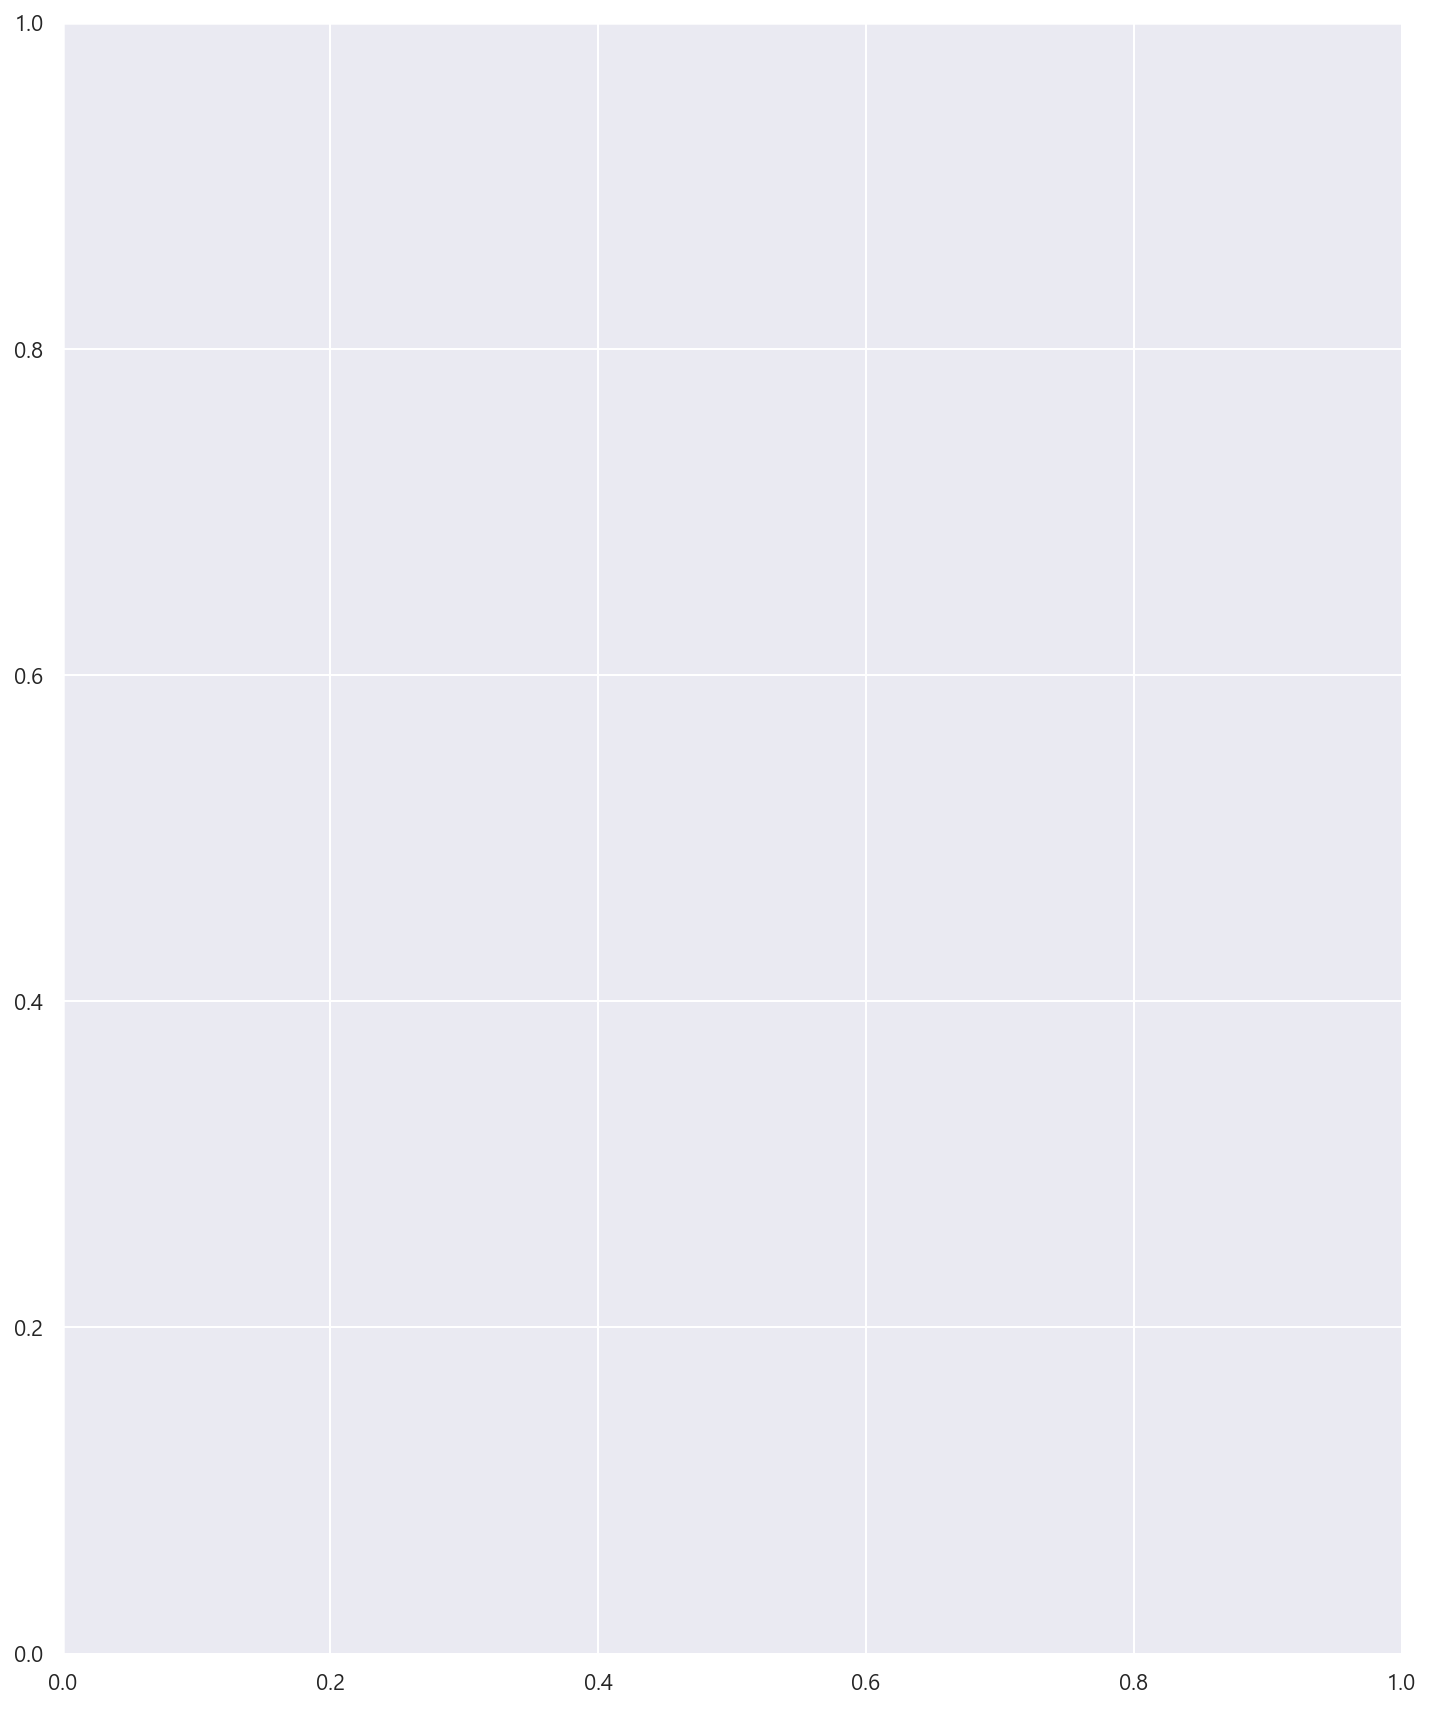

In [49]:
#feature 중요도도 그려볼 수 있다. 
from xgboost import plot_importance
import matplotlib.pyplot as plt
%matplotlib inline

fig, ax = plt.subplots(figsize=(12, 15))

# 사이킷런 래퍼 클래스를 입력해도 무방. 
plot_importance(lgbm_wrapper, ax=ax)
plt.rc('font', size=20)        # 기본 폰트 크기
plt.rc('axes', labelsize=20)   # x,y축 label 폰트 크기
plt.rc('xtick', labelsize=20)  # x축 눈금 폰트 크기 
plt.rc('ytick', labelsize=20)  # y축 눈금 폰트 크기
plt.rc('legend', fontsize = 30)
plt.show()

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

def get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix( y_test, pred)
    accuracy = accuracy_score(y_test , pred)
    precision = precision_score(y_test , pred)
    recall = recall_score(y_test , pred)
    f1 = f1_score(y_test,pred)
    # ROC-AUC 추가 
    roc_auc = roc_auc_score(y_test, pred_proba)
    print('오차 행렬')
    print(confusion)
    # ROC-AUC print 추가
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, 재현율: {2:.4f},\
    F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))

# 파일에 넣기

In [81]:
sub = pd.read_csv('LGBM+oversample+hyperopt.csv')

In [82]:
sub['Y_LABEL'] = preds
sub.head(3)

,ID,Y_LABEL
0,TEST_0000,1
1,TEST_0001,1
2,TEST_0002,0


In [83]:
sub.to_csv('LGBM+oversample+hyperopt.csv',index=False)

# TEST

In [ ]:
test_new